# **`1. Business Understanding`**

## Breast Cancer Tumor Classification using SVM

Breast cancer is the most common cancer among women worldwide, accounting for approximately 25% of all cancer cases. In 2015 alone, it affected over 2.1 million people. It typically begins when cells in the breast grow uncontrollably, often forming tumors that may be detected through imaging (e.g., X-rays) or physical examination.

A critical challenge in breast cancer diagnosis is accurately classifying tumors as **malignant (cancerous)** or **benign (non-cancerous)**. This repository aims to address this challenge using **Support Vector Machines (SVM)** and the **Breast Cancer Wisconsin (Diagnostic) Dataset**.

### Project Goals

* Perform data preprocessing and exploration
* Train and evaluate an SVM model for tumor classification
* Compare results and assess model performance using key metrics

# **`2. Data Understanding`**

### Dataset

* **Breast Cancer Wisconsin (Diagnostic) Dataset**
* Contains features computed from digitized images of fine needle aspirates (FNAs) of breast masses
* Each sample is labeled as either **malignant** or **benign**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
import math

# Display all column
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format) # Prevent numpy exponential 

In [2]:
# Load data
df = pd.read_csv(r"Data\breast-cancer.csv")

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,"1,001.00",0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,"2,019.00",0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,"1,326.00",0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,"1,956.00",0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,"1,203.00",0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,"1,709.00",0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,"1,297.00",0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,"1,575.00",0.14,0.20,0.40,0.16,0.24,0.08


In [3]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Describe the Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.00,"30,371,831.43","125,020,585.61","8,670.00","869,218.00","906,024.00","8,813,129.00","911,320,502.00"
radius_mean,569.00,14.13,3.52,6.98,11.70,13.37,15.78,28.11
texture_mean,569.00,19.29,4.30,9.71,16.17,18.84,21.80,39.28
perimeter_mean,569.00,91.97,24.30,43.79,75.17,86.24,104.10,188.50
area_mean,569.00,654.89,351.91,143.50,420.30,551.10,782.70,"2,501.00"
smoothness_mean,569.00,0.10,0.01,0.05,0.09,0.10,0.11,0.16
compactness_mean,569.00,0.10,0.05,0.02,0.06,0.09,0.13,0.35
concavity_mean,569.00,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave points_mean,569.00,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry_mean,569.00,0.18,0.03,0.11,0.16,0.18,0.20,0.30


In [5]:
# Check for missing values
df.isna().sum().reset_index()

,index,0
0,id,0
1,diagnosis,0
2,radius_mean,0
3,texture_mean,0
4,perimeter_mean,0
5,area_mean,0
6,smoothness_mean,0
7,compactness_mean,0
8,concavity_mean,0
9,concave points_mean,0


In [6]:
# Check for Duplicated rows
print(f"There are {df.duplicated().sum()} duplicated values in the dataset")

There are 0 duplicated values in the dataset


# **Eploratory Data Analysis**

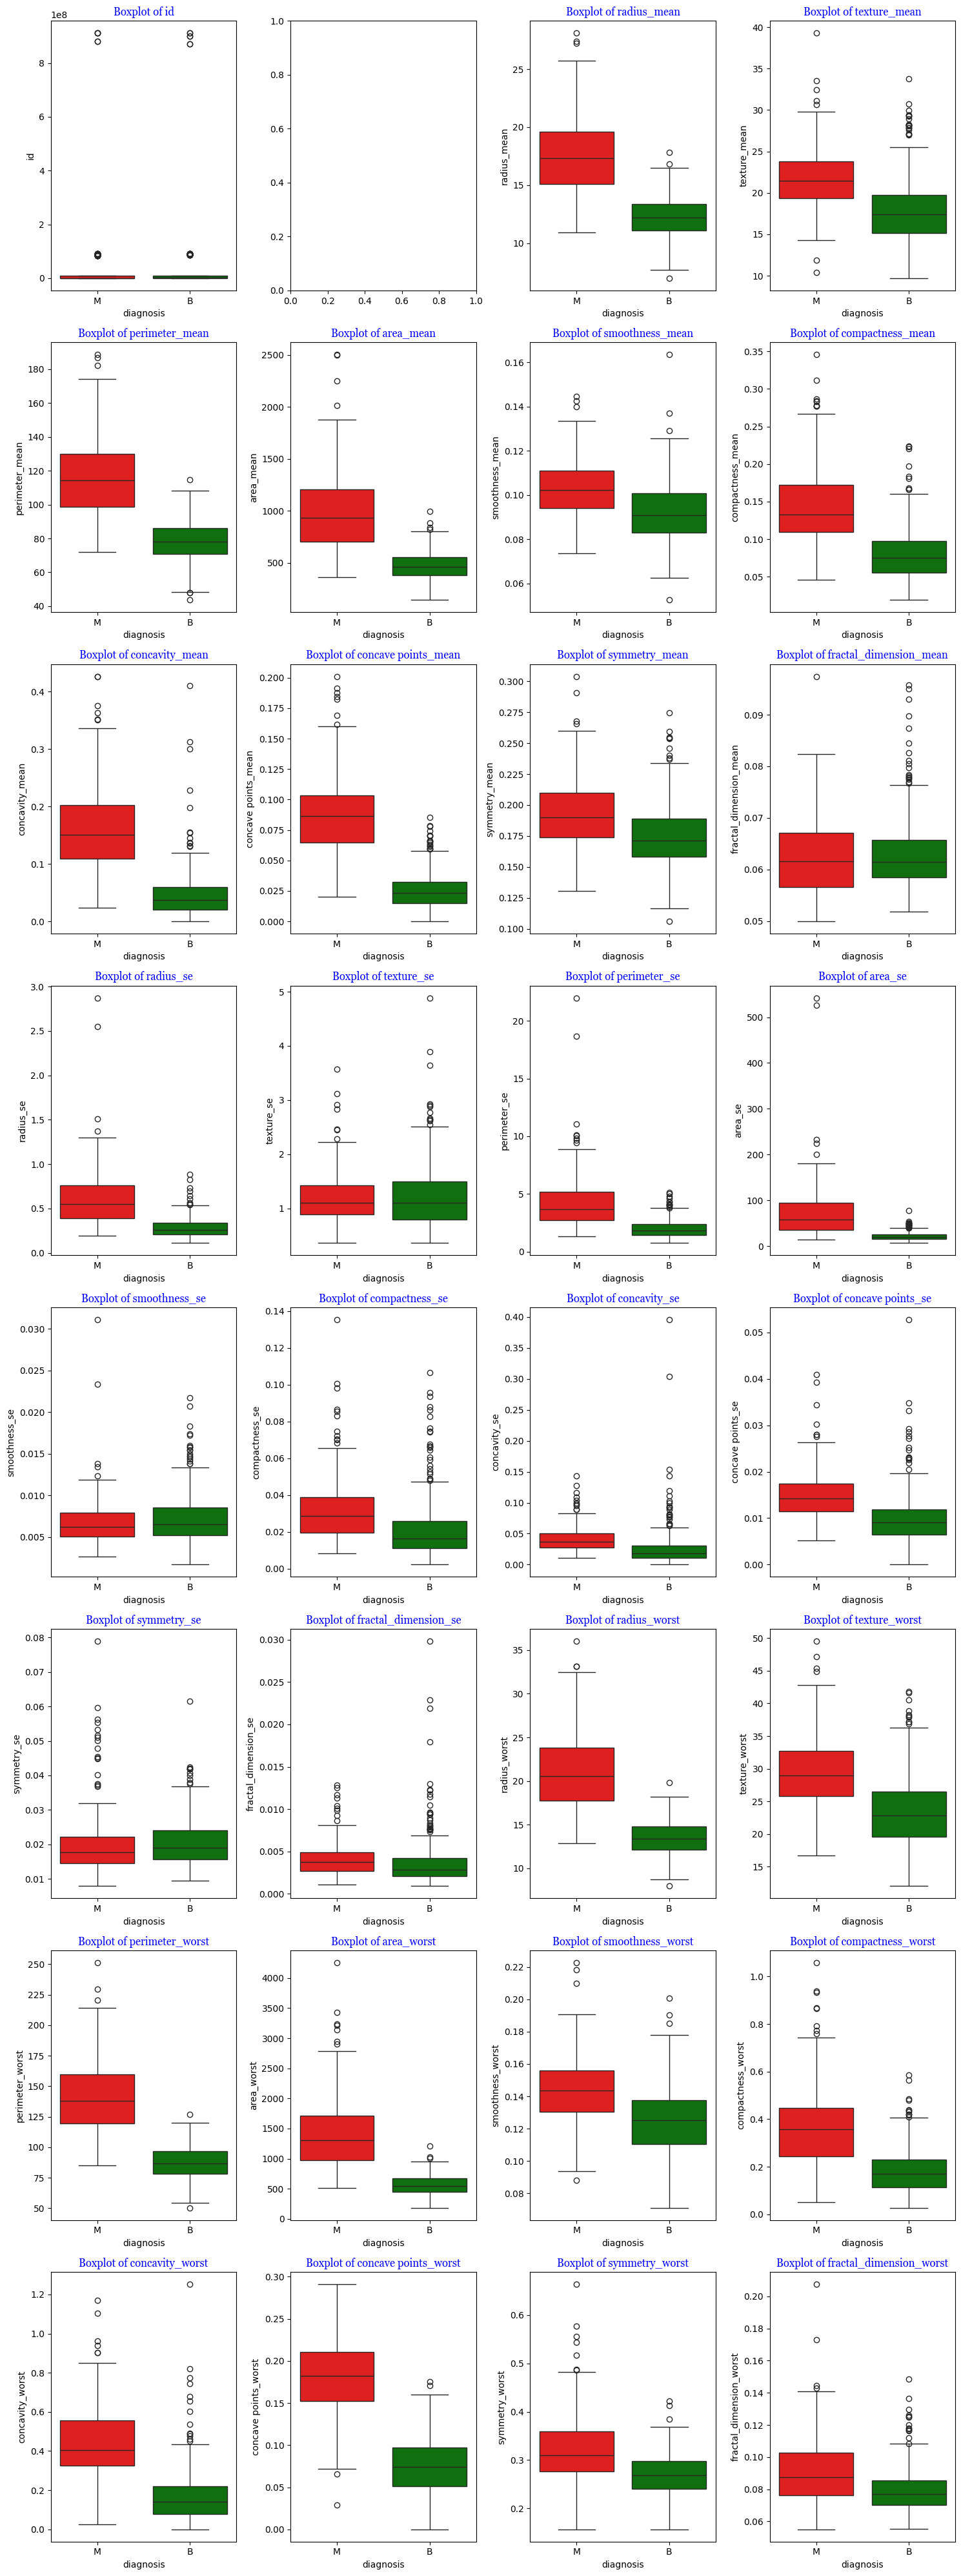

In [7]:
# Check for outliers in the dataset using boxplots

# Define a function to set up a reusable plotting grid (figure and axes)
def grid():
    ncols = 4  # Number of columns in the subplot grid
    num_features = len(df.columns.drop('diagnosis'))  # Exclude target variable
    nrows = math.ceil(num_features / ncols)  # Calculate rows needed (ceiling division)

    # Create a figure and axes grid with the specified layout
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

    # Flatten the 2D axes array to 1D for easier iteration
    axes = axes.flatten()

    return fig, axes  # Return figure and axes to be used for plotting

# Generate the figure and axes grid
fig, axes = grid()

# Loop through each column in the DataFrame
# Skip the 'diagnosis' column since it's the classification label
for i, col in enumerate(df.columns):
    if col == 'diagnosis':
        continue  # Skip the target column

    # Plot a boxplot for each feature, grouped by diagnosis
    sns.boxplot(
        data=df,
        x='diagnosis',
        y=col,
        ax=axes[i],
        palette=["red", "green"]  # Use custom color palette
    )

    # Set the title of the subplot with custom font and color
    axes[i].set_title(f'Boxplot of {col}', fontname='Georgia', color='blue')

# After plotting, some subplots may be unused if total features < grid slots
# This loop removes any extra empty subplots for a cleaner layout
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete unused axes

# Automatically adjust subplot spacing to prevent overlap
plt.tight_layout()

# Display the full grid of boxplots
plt.show()


### Notes

- Almost all columns have outliers

- This will call for standardization (Standadize data to  have a mean of 0 and standard deviation of 1)

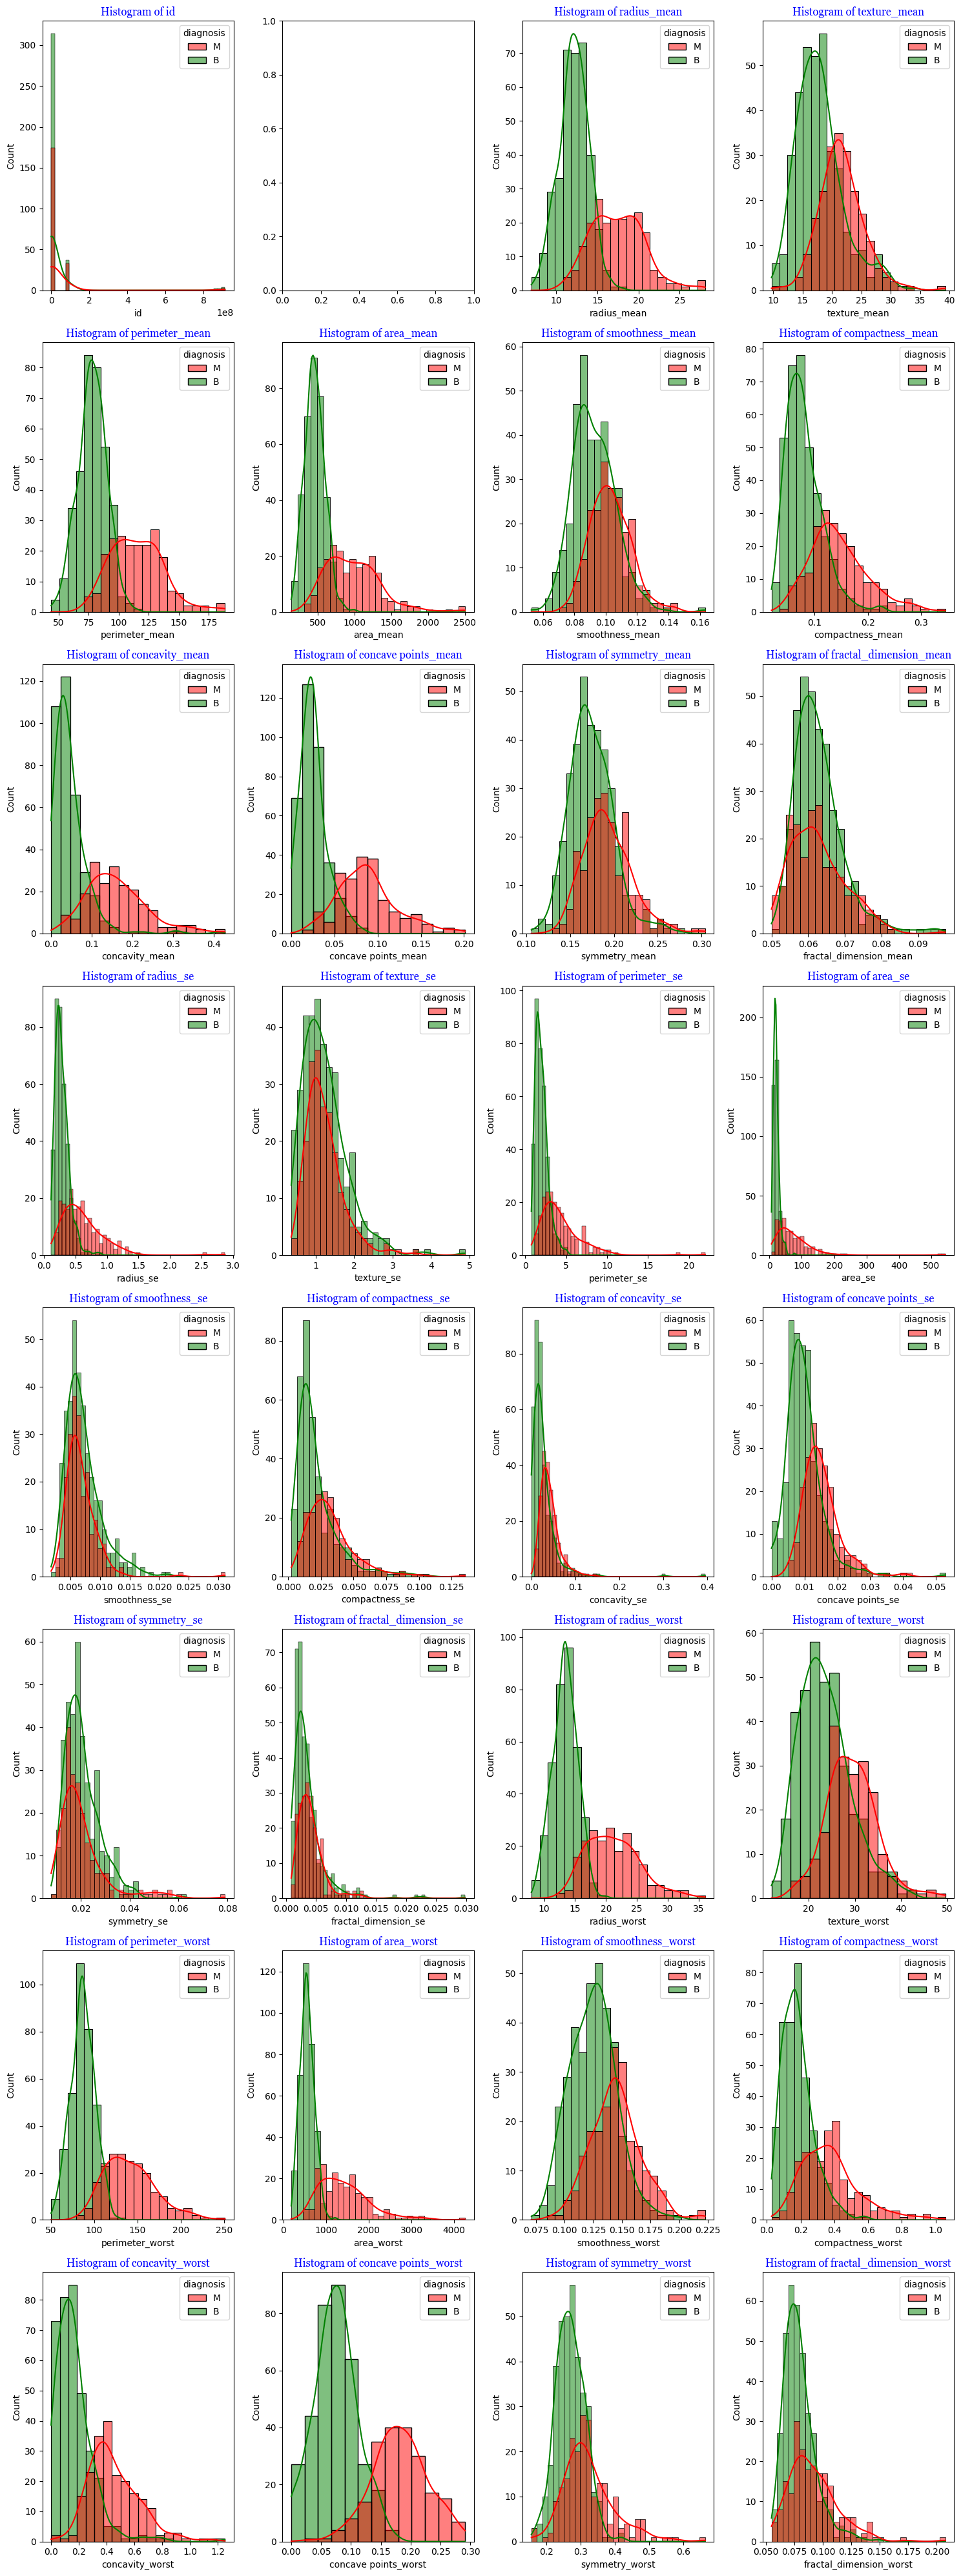

In [8]:
# Call the grid function to create a grid of subplots
# Returns the figure (fig) and the flattened array of axes (axes)
fig, axes = grid()

# Loop through each column in the DataFrame
# Skip the 'diagnosis' column since it's used as the hue (categorical variable)
for i, col in enumerate(df.columns):
    if col == 'diagnosis':
        continue

    # Plot a histogram for each feature with KDE and diagnosis-based hue
    sns.histplot(
        data=df,
        x=col,
        ax=axes[i],
        kde=True,
        color="blue",
        hue="diagnosis",
        palette=["red", "green"]
    )

    # Set the title for each subplot with consistent font and color styling
    axes[i].set_title(f'Histogram of {col}', fontname='Georgia', color="blue")

# Remove any unused subplot axes to keep the layout clean
# This handles cases where the number of features < total grid slots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Automatically adjust subplot layout to prevent overlapping labels and titles
plt.tight_layout()

# Display the final figure with all histograms
plt.show()

## Notes
 - Most columns do not follow gaussian distribution

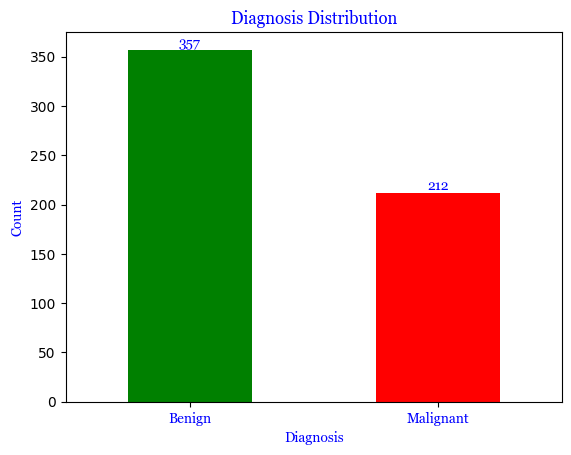

In [9]:
# Check Distribution of the Target variable
# This will help us know how diagnosis column is distributed
# Benign vs Malignant

# Get value counts
counts = df["diagnosis"].value_counts()

# Map colors based on index values ("M" or "B")
colors = ['red' if diagnosis == 'M' else 'green' for diagnosis in counts.index]

# Plot the bar chart
ax = counts.plot.bar(color=colors)

ax.bar_label(ax.containers[0], 
             fontname="georgia", 
             color="blue")


plt.xlabel("Diagnosis", fontname="georgia", color="blue")
plt.ylabel("Count", fontname="georgia", color="blue")
plt.title("Diagnosis Distribution", fontname="georgia", color="blue")
plt.xticks(ticks=[0, 1], labels=["Benign", "Malignant"], rotation=0, color="blue", fontname="georgia")
plt.show()

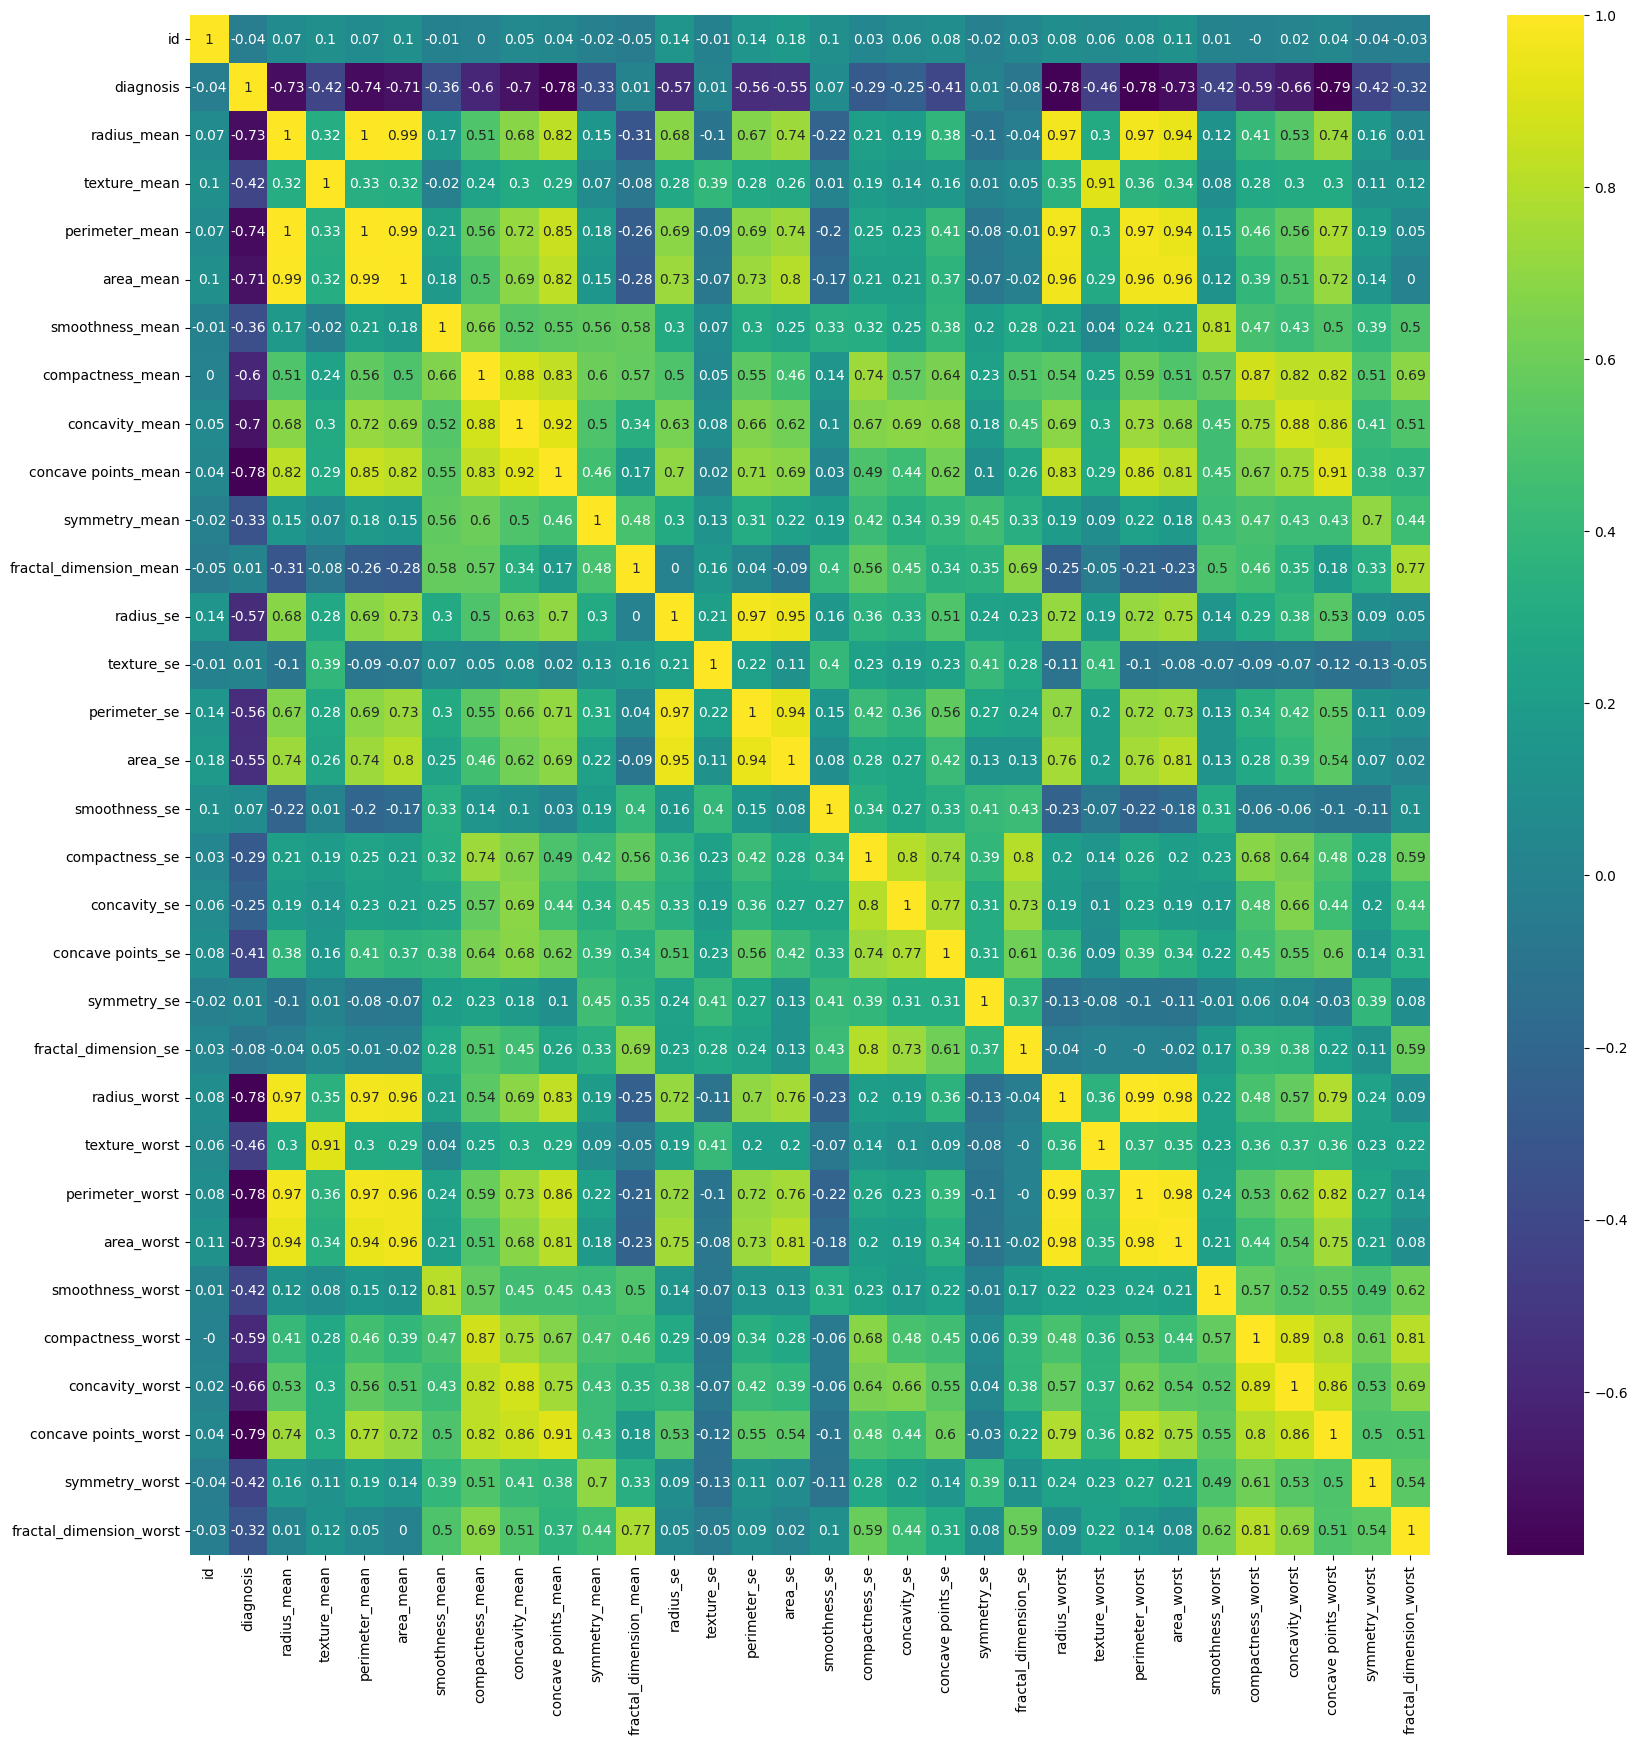

In [10]:
# Make a copy of df
df_copy = df.copy()

# Replace 'M' with 0 and 'B' with 1 in the diagnosis column
df_copy["diagnosis"] = df_copy["diagnosis"].replace({"M": 0, "B": 1})

# Check the correlation matrix
correlation_matrix = df_copy.corr().round(2)

# Display the correlation matrix
plt.figure(figsize=(20, 20)) 

sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap="viridis")

plt.show()


## Notes

**1. Radius, Perimeter, and Area**

These features are strongly correlated because they all relate to the size of the nuclei.

For instance, a larger radius will naturally lead to a larger perimeter and area.

This redundancy can introduce multicollinearity.


**2. Shape-related features (Compactness, Concavity, Concave points)**

These capture aspects of nucleus shape irregularity.

Since they're all measuring shape in similar ways, they often show high inter-correlation.

These features tend to co-vary in malignant tumors (which often have irregular shapes).


**3. Texture features (e.g., texture mean, standard error, worst)**

Texture describes the variation in gray-level values in the cell images.

These features are typically less correlated with size, but inter-correlated among themselves.

They can still provide unique diagnostic information.

<Figure size 600x600 with 0 Axes>

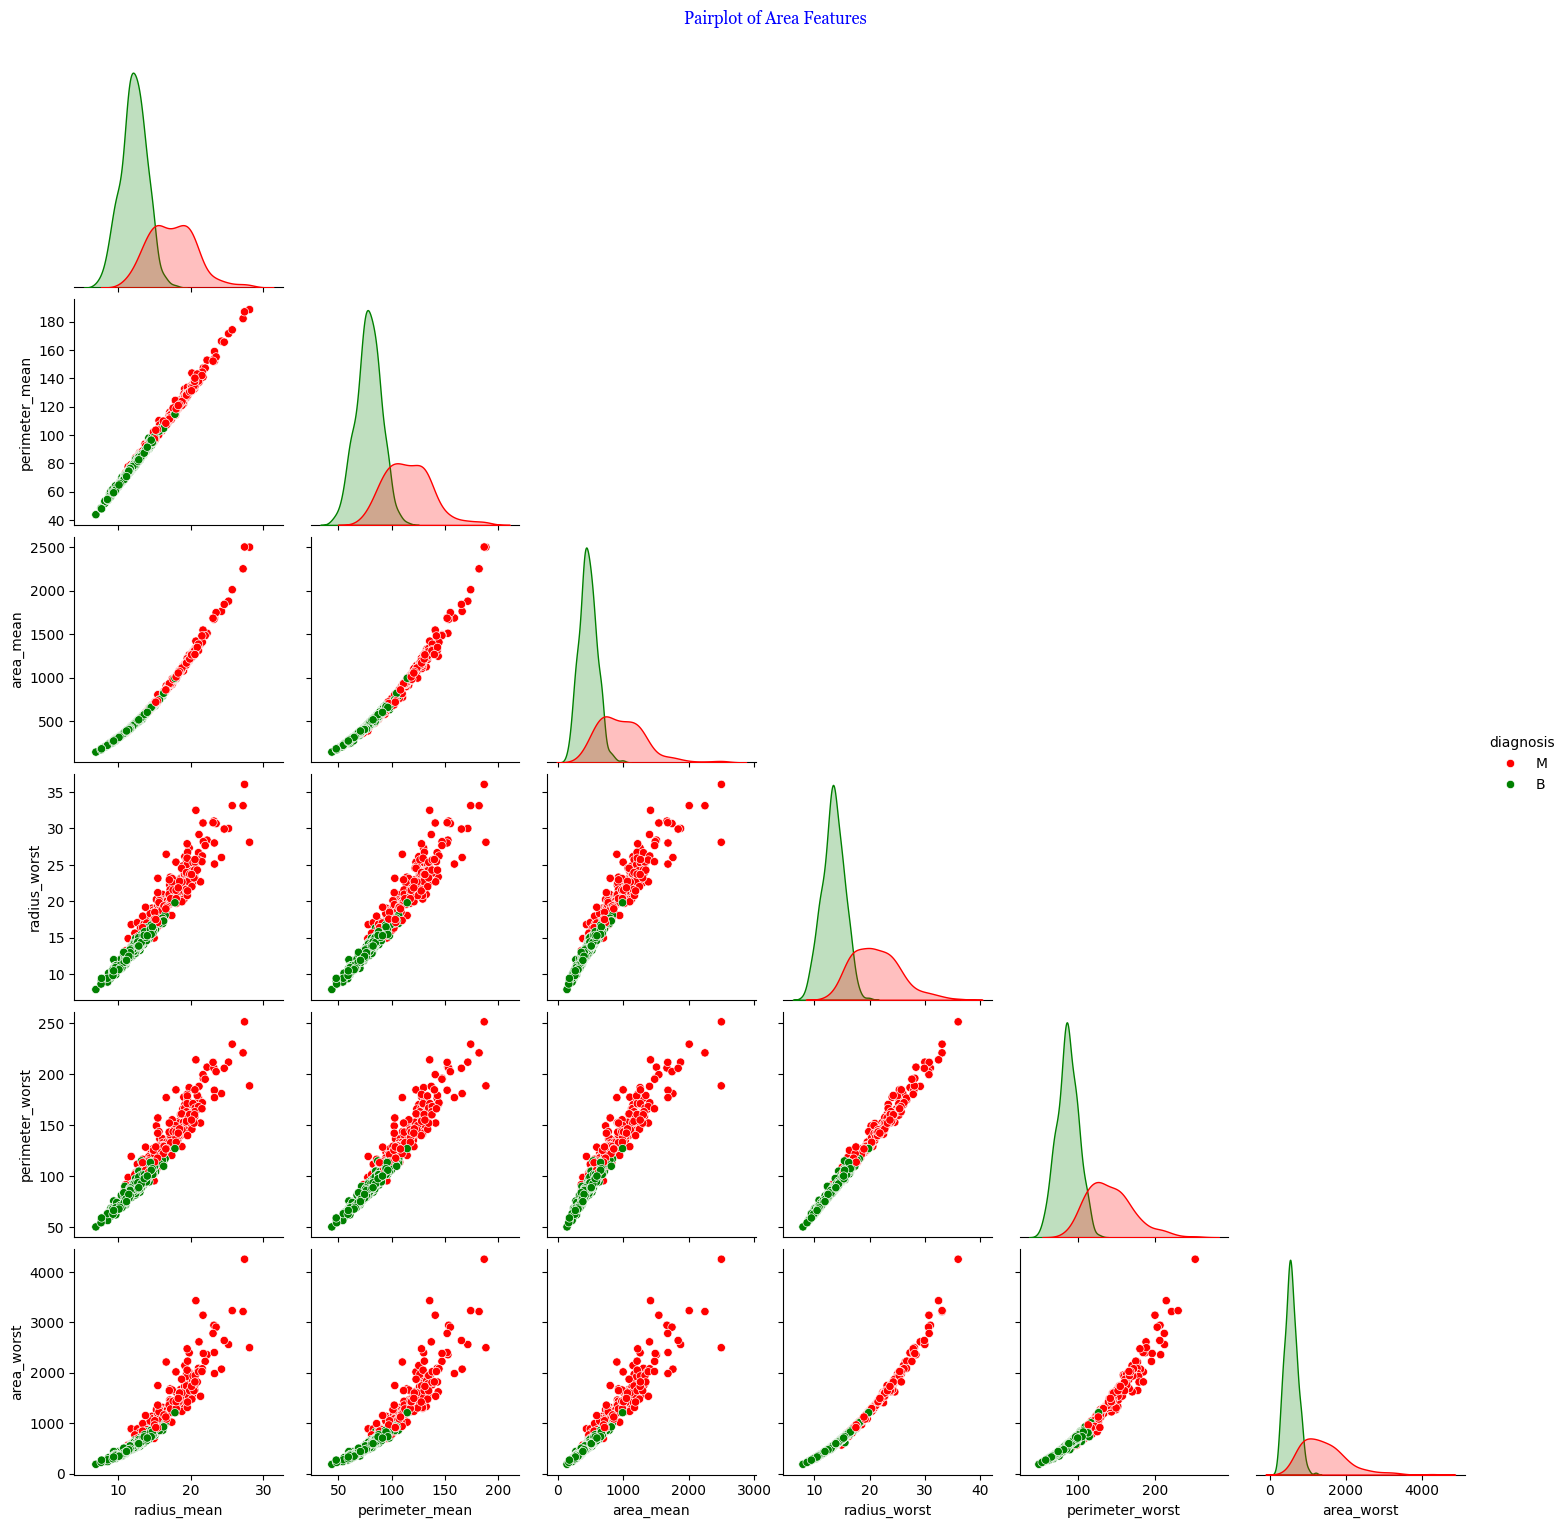

In [11]:
# Selected correlated features
selected_features = [
    "radius_mean", "perimeter_mean", "area_mean",
    "radius_worst", "perimeter_worst", "area_worst",
    "diagnosis"]

# Create the pairplot
plt.figure(figsize=(6, 6))

sns.pairplot(df[selected_features], 
             corner=True, 
             plot_kws={'color': 'blue'}, 
             hue='diagnosis', 
             palette={"M": "red", "B": "green"}) 

plt.suptitle("Pairplot of Area Features", 
             y=1.02, 
             fontname="Georgia", 
             color="blue") 

plt.show()

## Notes

If the scatterplot between two features looks like a narrow diagonal line (either upward or downward), it indicates a strong correlation (positive or negative).

The closer the points are to a straight line, the higher the correlation.

Therefore, size feature are highly correlated and this raises multicollineority concerns

<Figure size 600x600 with 0 Axes>

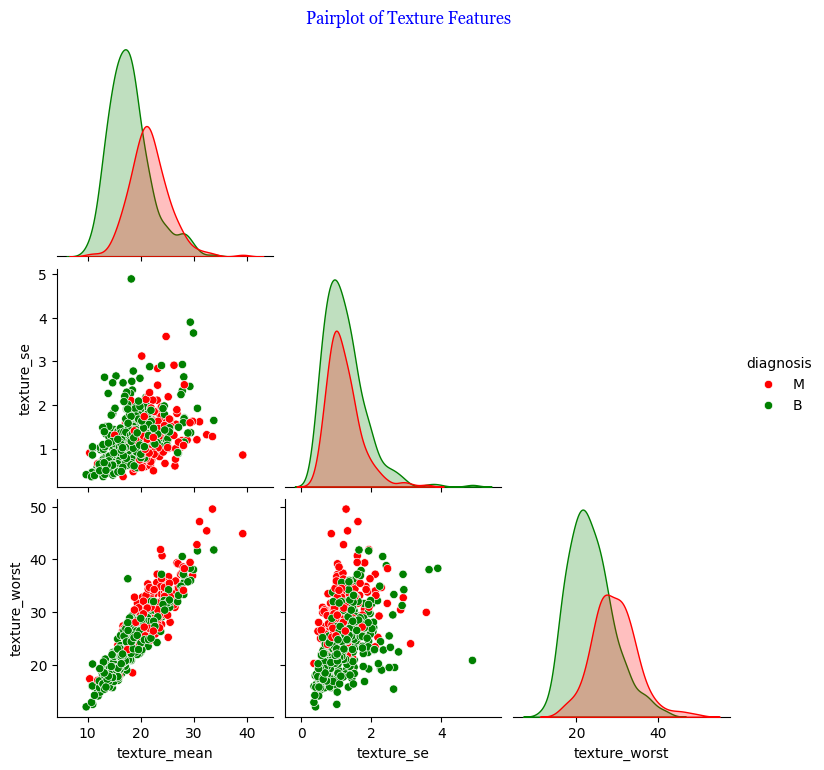

In [12]:
# Texture features pairplot
selected_features = [
    "texture_mean", "texture_se", "texture_worst",
    "diagnosis"] 

plt.figure(figsize=(6, 6))

sns.pairplot(df[selected_features], 
             corner=True, plot_kws={'color': 'blue'}, 
             hue='diagnosis', palette={"M": "red", "B": "green"})

plt.suptitle("Pairplot of Texture Features", 
             y=1.02, 
             fontname="Georgia", 
             color="blue")

plt.show()

## Notes

- Texture features are not very highly correlated except for Texture-worst and Texture-Mean

<Figure size 500x500 with 0 Axes>

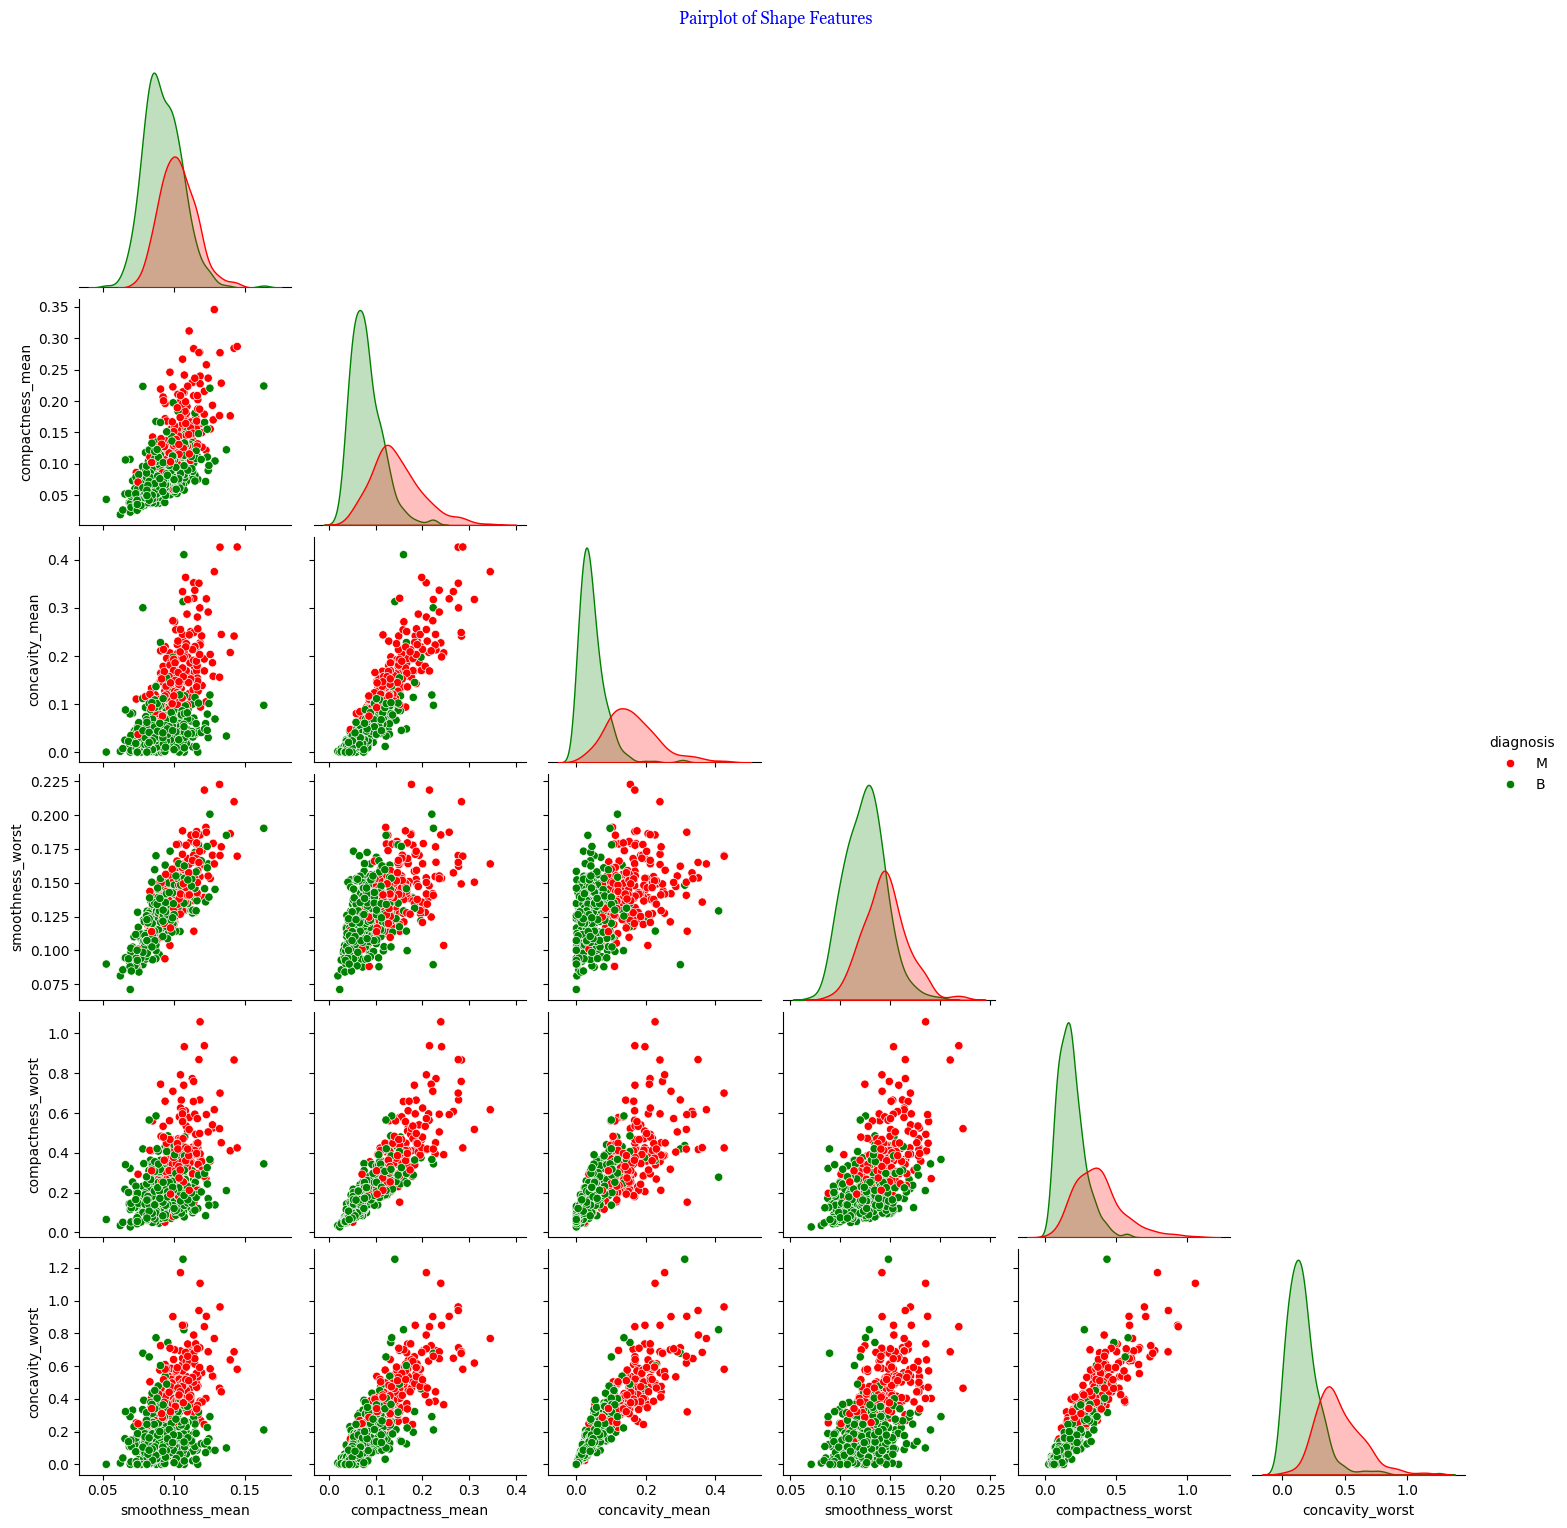

In [13]:
# Shape features pairplot
selected_features = [
    "smoothness_mean", "compactness_mean", "concavity_mean",
    "smoothness_worst", "compactness_worst", "concavity_worst",
    "diagnosis"]

plt.figure(figsize=(5, 5))

sns.pairplot(df[selected_features], 
             corner=True, 
             plot_kws={'color': 'blue'}, 
             hue='diagnosis', 
             palette={"M": "red", "B": "green"})

plt.suptitle("Pairplot of Shape Features", 
             y=1.02, 
             fontname="Georgia", 
             color="blue")
plt.show()

# **`4. Data Preparation`**

## Notes

Shape features are not highly correlated

Except for Concavity and Compactness

After EDA:

Next steps will be

1. Drop area_mean and perimeter mean and keep only radius_mean as they are very correlated and this will cause noise

2. Drop _worst and _se columns as they are redudannt and could lead to decreased generalization by the model

3. Drop the ID column

4. Revisit if need be to revise the features based on model perfomance

In [ ]:

# STEP 1: Drop columns with "_se" and "_worst"
# These represent standard error and worst-case measurements
# which can be redundant and may introduce multicollinearity

filtered_columns = [col for col in df.columns if "_se" not in col and "_worst" not in col]

# STEP 2: Drop highly correlated features
# 'perimeter_mean' and 'area_mean' are highly correlated with 'radius_mean'
# Keeping just 'radius_mean' reduces redundancy
# ID is not relevant

columns_to_drop = ["perimeter_mean", "area_mean", "id"]

# Filter them out from the column list
filtered_columns = [col for col in filtered_columns if col not in columns_to_drop]

# STEP 3: Create a reduced DataFrame
# This now contains only selected, non-redundant features

df_reduced = df[filtered_columns]

df_reduced


,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,0.12,0.28,0.30,0.15,0.24,0.08
1,M,20.57,17.77,0.08,0.08,0.09,0.07,0.18,0.06
2,M,19.69,21.25,0.11,0.16,0.20,0.13,0.21,0.06
3,M,11.42,20.38,0.14,0.28,0.24,0.11,0.26,0.10
4,M,20.29,14.34,0.10,0.13,0.20,0.10,0.18,0.06
...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11,0.12,0.24,0.14,0.17,0.06
565,M,20.13,28.25,0.10,0.10,0.14,0.10,0.18,0.06
566,M,16.60,28.08,0.08,0.10,0.09,0.05,0.16,0.06
567,M,20.60,29.33,0.12,0.28,0.35,0.15,0.24,0.07
